In [58]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


In [5]:
from tensorflow.keras.datasets import mnist

DATA EXPLORATION

In [6]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [8]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train[0].shape

In [10]:
X_test.shape

(10000, 28, 28)

In [13]:
num_labels = len(np.unique(y_train))
num_labels

10

In [16]:
unique,counts =np.unique(y_train,return_counts=True)
print("Train labels: ",dict(zip(unique,counts)))

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [21]:
indices = np.random.randint(0,X_train.shape[0],size=16)
images = X_train[indices]

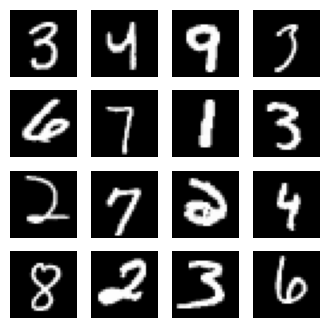

In [24]:
plt.figure(figsize=(4,4))
for i in range(len(indices)):
    plt.subplot(4,4,i+1)
    image = images[i]
    plt.imshow(image,cmap="gray")
    plt.axis("off")

In [25]:
from tensorflow.keras.utils import to_categorical

In [26]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [27]:
y_train = to_categorical(y_train)

In [29]:
y_train[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [30]:
y_test = to_categorical(y_test)

In [32]:
input_size = X_train.shape[1] * X_train.shape[2]
input_size

784

In [33]:
X_train[0].shape

(28, 28)

In [34]:
X_train = np.reshape(X_train,[-1,input_size])
X_train[0].shape

(784,)

In [35]:
X_test = np.reshape(X_test,[-1,input_size])
X_test[0].shape

(784,)

In [36]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

MODEL BUILDING AND TRAINING

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [42]:
model = Sequential()
model.add(Dense(512,input_dim = input_size, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_labels,activation='softmax'))

/home/dipesh/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
model.fit(X_train,y_train,epochs=20,validation_split=0.2)

Epoch 1/20


2024-10-14 17:03:43.195499: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150528000 exceeds 10% of free system memory.


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.8833 - loss: 0.3832 - val_accuracy: 0.9661 - val_loss: 0.1106
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9621 - loss: 0.1174 - val_accuracy: 0.9686 - val_loss: 0.1046
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9747 - loss: 0.0807 - val_accuracy: 0.9741 - val_loss: 0.0880
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9794 - loss: 0.0670 - val_accuracy: 0.9720 - val_loss: 0.0937
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9820 - loss: 0.0583 - val_accuracy: 0.9761 - val_loss: 0.0928
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9849 - loss: 0.0474 - val_accuracy: 0.9749 - val_loss: 0.1039
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9853 - loss: 0.0457 - val_accuracy: 0.9770 - val_loss: 0.0909
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9870 - loss: 0.04

EVALUATING THE TRAINED MODEL

In [46]:
loss,acc = model.evaluate(X_test,y_test)
acc

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9759 - loss: 0.1602


0.9811000227928162

In [48]:
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [49]:
y_pred[0]

array([2.87688737e-23, 1.55046766e-15, 4.76094932e-16, 4.56177590e-14,
       7.35705746e-20, 1.25674235e-23, 7.07221216e-29, 9.99999940e-01,
       2.50256387e-16, 5.28000810e-10], dtype=float32)

In [50]:
y_pred = y_pred.argmax(axis=1)
y_pred[0]

7

In [52]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score

In [54]:
y_test = y_test.argmax(axis=1)

In [55]:
matrix = confusion_matrix(y_test,y_pred)
matrix

array([[ 970,    1,    0,    1,    0,    0,    4,    1,    3,    0],
       [   1, 1126,    2,    0,    0,    1,    3,    0,    2,    0],
       [   3,    0, 1019,    0,    2,    0,    1,    3,    3,    1],
       [   0,    1,    5,  991,    0,    4,    0,    4,    3,    2],
       [   2,    0,    2,    0,  963,    0,    6,    0,    0,    9],
       [   2,    0,    0,    9,    1,  863,    6,    1,    6,    4],
       [   6,    2,    1,    1,    2,    4,  942,    0,    0,    0],
       [   1,    4,   10,    0,    0,    0,    0, 1004,    1,    8],
       [   3,    1,    7,    9,    0,    3,    1,    3,  946,    1],
       [   3,    2,    0,    4,    6,    1,    1,    2,    3,  987]])

In [56]:
precision_score(y_test,y_pred,average=None)

array([0.97880928, 0.99032542, 0.97418738, 0.97635468, 0.98870637,
       0.98515982, 0.97717842, 0.98624754, 0.97828335, 0.97529644])

In [57]:
recall_score(y_test,y_pred,average=None)

array([0.98979592, 0.99207048, 0.9874031 , 0.98118812, 0.98065173,
       0.96748879, 0.98329854, 0.9766537 , 0.97125257, 0.97819623])